[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0049 - val_loss: 6.3839e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 3.3123e-04 - val_loss: 0.0014
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 2.5876e-04 - val_loss: 7.2851e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.1256e-04 - val_loss: 4.6012e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 2.1343e-04 - val_loss: 0.0011
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 2.1193e-04 - val_loss: 6.7329e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 1.4150e-04 - val_loss: 5.2869e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 1.4611e-04 - val_loss: 9.5984e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 1.2455e-04 - val_loss: 5.0160e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.4867e-04 - val_loss: 5.3887e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 1.2659e-04 - val_los

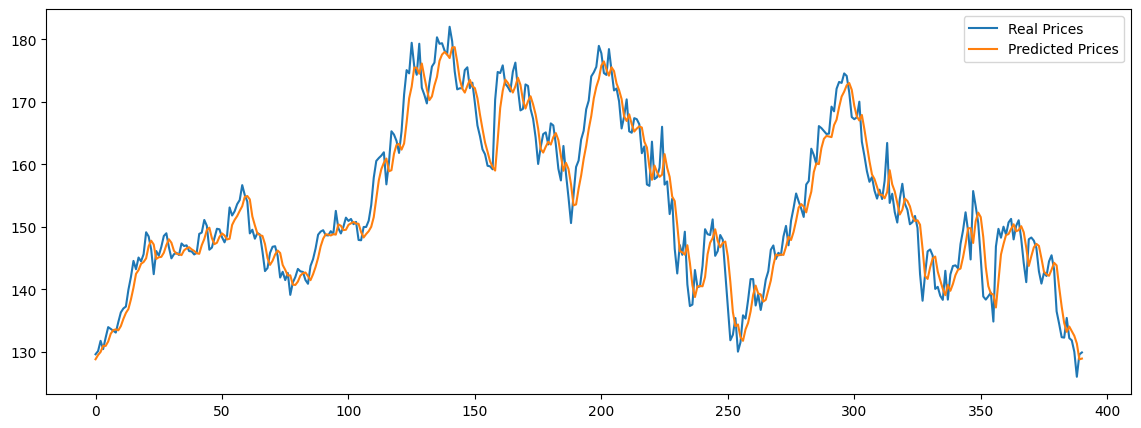

In [1]:
#Develop a GRU based term stock price prediction model for tickers in yahoo finance

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

model = Sequential([
    GRU(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=Adam(), loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(real_prices, label="Real Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.legend()
plt.show()

